## Booking classification


The dataset contains information about the booking of a hotel. Our goal is to predict whether the booking will be successful or not based on information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things

### Import Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Import Dataset

In [4]:
booking = pd.read_csv('Booking-Data.csv')
booking

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [5]:
booking.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [9]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [10]:
booking.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [20]:
booking.duplicated().sum()

0

In [11]:
booking.describe(include='object')

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27835,28130,23214,24390


In [13]:
booking.describe(include='number').round(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00
mean,1.84,0.11,0.81,2.20,0.03,85.23,2017.82,7.42,15.60,0.03,0.02,0.15,103.42,0.62
std,0.52,0.40,0.87,1.41,0.17,85.93,0.38,3.07,8.74,0.16,0.37,1.75,35.09,0.79
min,0.00,0.00,0.00,0.00,0.00,0.00,2017.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,0.00,0.00,1.00,0.00,17.00,2018.00,5.00,8.00,0.00,0.00,0.00,80.30,0.00
50%,2.00,0.00,1.00,2.00,0.00,57.00,2018.00,8.00,16.00,0.00,0.00,0.00,99.45,0.00
75%,2.00,0.00,2.00,3.00,0.00,126.00,2018.00,10.00,23.00,0.00,0.00,0.00,120.00,1.00
max,4.00,10.00,7.00,17.00,1.00,443.00,2018.00,12.00,31.00,1.00,13.00,58.00,540.00,5.00


### Data Preprocessing

In [17]:
booking.dtypes[booking.dtypes == 'object']

Booking_ID             object
type_of_meal_plan      object
room_type_reserved     object
market_segment_type    object
booking_status         object
dtype: object

In [21]:
booking['no_of_previous_cancellations'].idxmax()

12097

In [22]:
booking.iloc[booking['no_of_previous_cancellations'].idxmax()]

Booking_ID                                 INN12098
no_of_adults                                      2
no_of_children                                    0
no_of_weekend_nights                              1
no_of_week_nights                                 1
type_of_meal_plan                       Meal Plan 1
required_car_parking_space                        0
room_type_reserved                      Room_Type 1
lead_time                                       190
arrival_year                                   2018
arrival_month                                     4
arrival_date                                      9
market_segment_type                         Offline
repeated_guest                                    1
no_of_previous_cancellations                     13
no_of_previous_bookings_not_canceled              1
avg_price_per_room                             70.0
no_of_special_requests                            0
booking_status                             Canceled
Name: 12097,

In [23]:
booking.iloc[booking['no_of_previous_cancellations'].idxmin()]

Booking_ID                                  INN00001
no_of_adults                                       2
no_of_children                                     0
no_of_weekend_nights                               1
no_of_week_nights                                  2
type_of_meal_plan                        Meal Plan 1
required_car_parking_space                         0
room_type_reserved                       Room_Type 1
lead_time                                        224
arrival_year                                    2017
arrival_month                                     10
arrival_date                                       2
market_segment_type                          Offline
repeated_guest                                     0
no_of_previous_cancellations                       0
no_of_previous_bookings_not_canceled               0
avg_price_per_room                              65.0
no_of_special_requests                             0
booking_status                          Not_Ca

In [24]:
booking.iloc[booking['avg_price_per_room'].idxmax()]

Booking_ID                                 INN33115
no_of_adults                                      2
no_of_children                                    0
no_of_weekend_nights                              0
no_of_week_nights                                 1
type_of_meal_plan                       Meal Plan 1
required_car_parking_space                        0
room_type_reserved                      Room_Type 1
lead_time                                        35
arrival_year                                   2018
arrival_month                                     3
arrival_date                                     25
market_segment_type                         Offline
repeated_guest                                    0
no_of_previous_cancellations                      0
no_of_previous_bookings_not_canceled              0
avg_price_per_room                            540.0
no_of_special_requests                            0
booking_status                             Canceled
Name: 33114,

In [25]:
booking.iloc[booking['avg_price_per_room'].idxmin()]

Booking_ID                                   INN00064
no_of_adults                                        1
no_of_children                                      0
no_of_weekend_nights                                0
no_of_week_nights                                   1
type_of_meal_plan                         Meal Plan 1
required_car_parking_space                          0
room_type_reserved                        Room_Type 1
lead_time                                           2
arrival_year                                     2017
arrival_month                                       9
arrival_date                                       10
market_segment_type                     Complementary
repeated_guest                                      0
no_of_previous_cancellations                        0
no_of_previous_bookings_not_canceled                0
avg_price_per_room                                0.0
no_of_special_requests                              1
booking_status              

In [26]:
booking.dtypes[booking.dtypes == 'object']

Booking_ID             object
type_of_meal_plan      object
room_type_reserved     object
market_segment_type    object
booking_status         object
dtype: object

In [27]:
booking['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

In [28]:
booking['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [29]:
booking['market_segment_type'].value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [30]:
booking['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

### Exploratory Data Analysis

<Axes: >

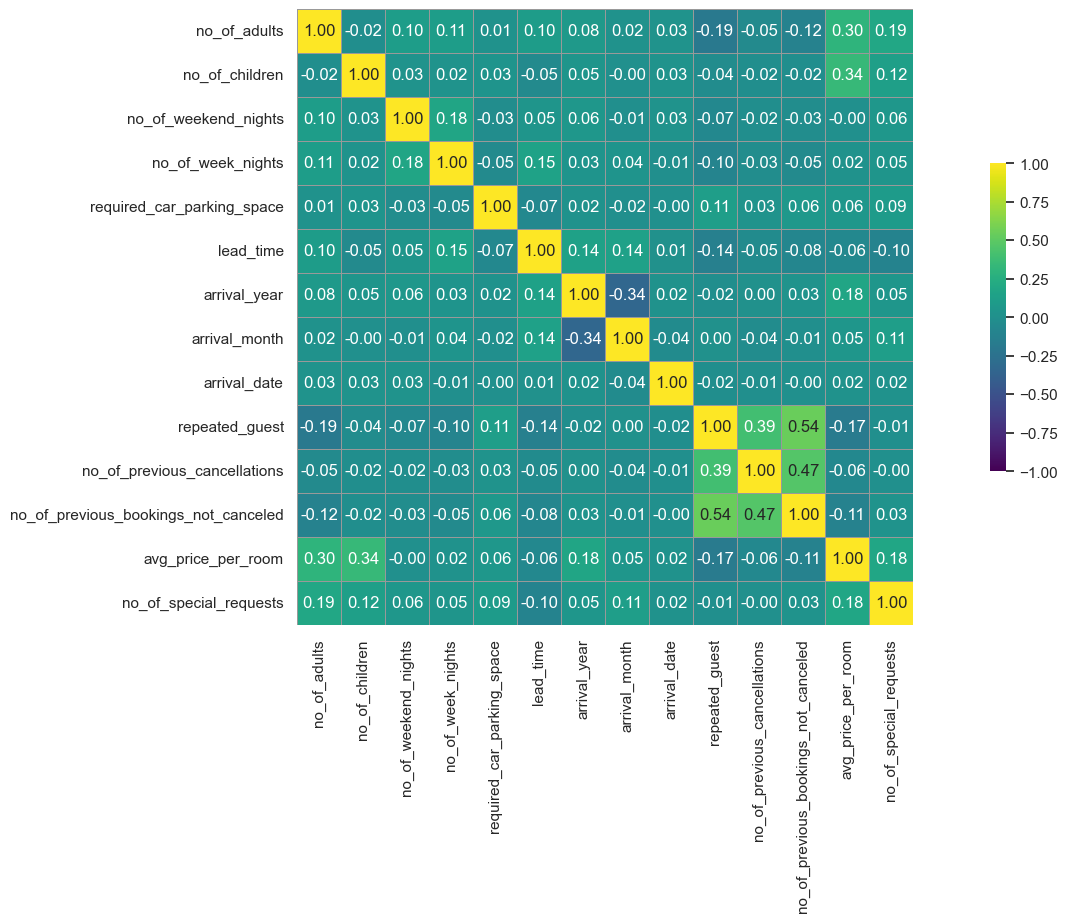

In [36]:
plt.figure(figsize=(20, 8))
sns.heatmap(booking.corr(numeric_only=True), annot=True, cmap='viridis', linewidths=.5, fmt='.2f', center=0.0, square=True, cbar_kws={"shrink": .5}, linecolor='#999999', vmin=-1, vmax=1, xticklabels=True, yticklabels=True, annot_kws={"size": 12}, cbar=True)

##### Categorical Features
- type_of_meal_plan      
- room_type_reserved     
- market_segment_type    
- booking_status   

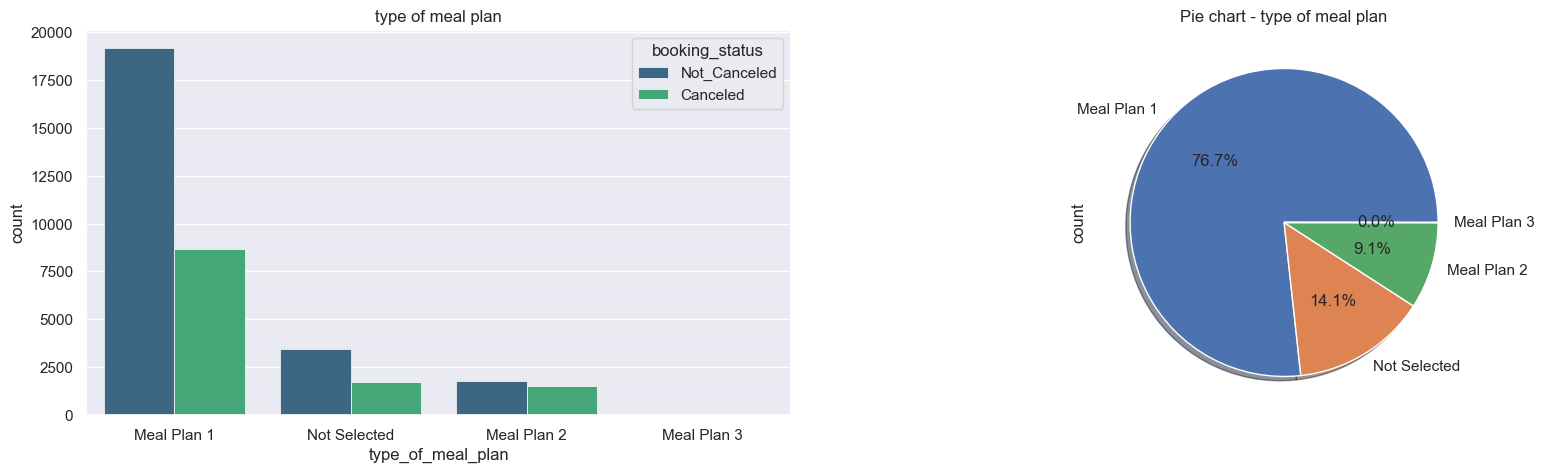

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(x='type_of_meal_plan', data=booking, hue='booking_status', palette='viridis', dodge=True, linewidth=0.5, ax=ax[0])
ax[0].set_title('type of meal plan')

booking['type_of_meal_plan'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, ax=ax[1])
ax[1].set_title('Pie chart - type of meal plan')

plt.show()

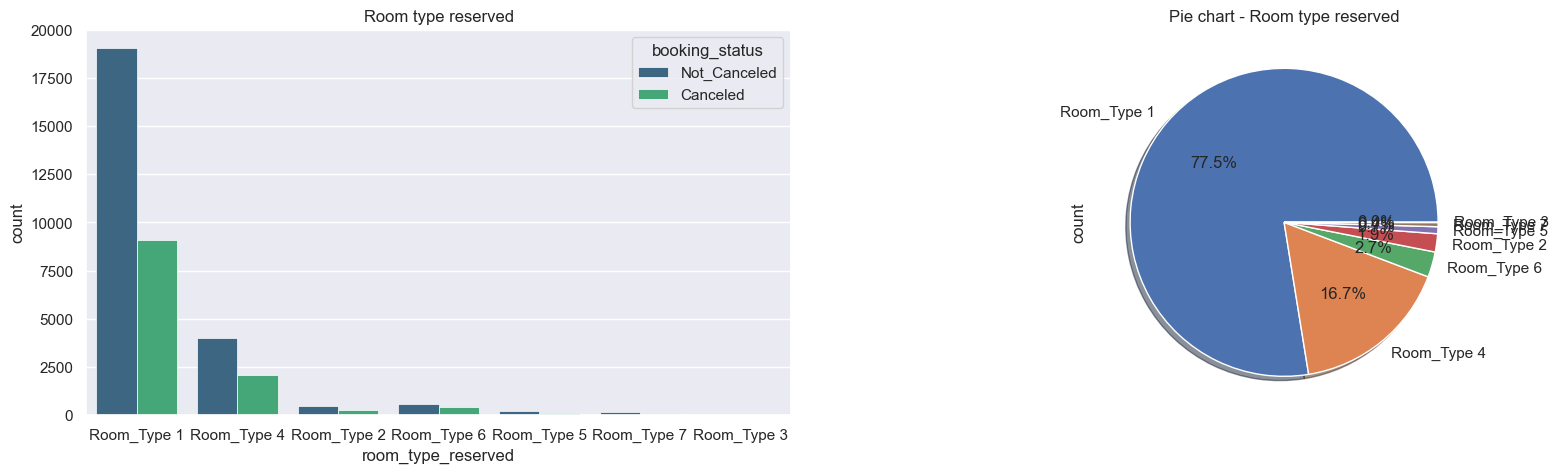

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(x='room_type_reserved', data=booking, hue='booking_status', palette='viridis', dodge=True, linewidth=0.5, ax=ax[0])
ax[0].set_title('Room type reserved')

booking['room_type_reserved'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, ax=ax[1])
ax[1].set_title('Pie chart - Room type reserved')

plt.show()

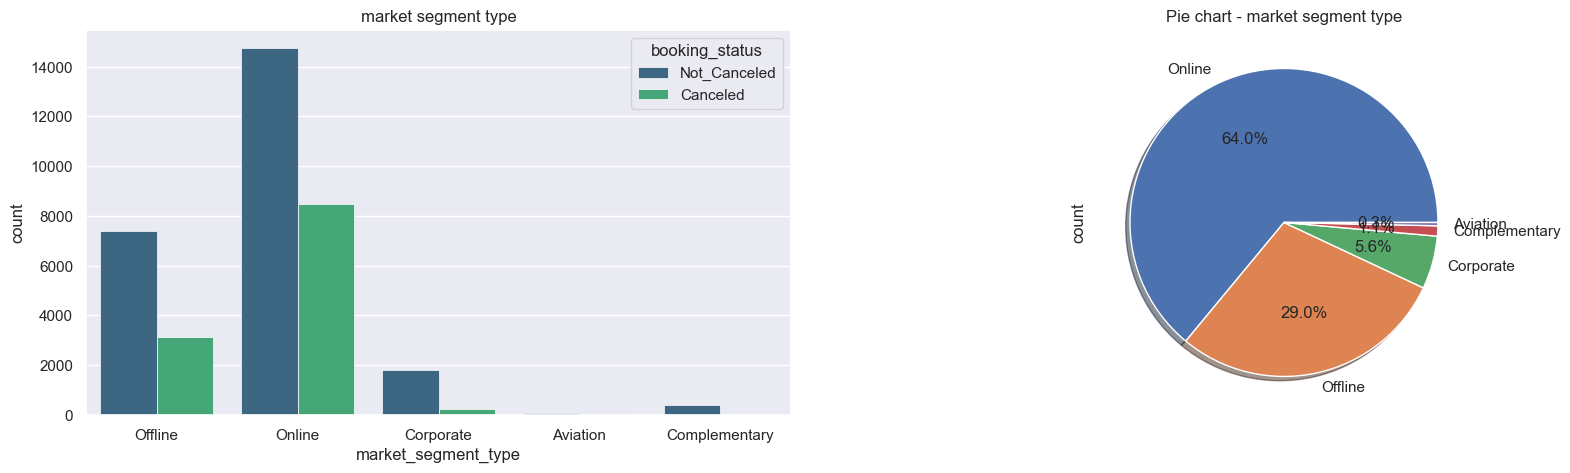

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(x='market_segment_type', data=booking, hue='booking_status', palette='viridis', dodge=True, linewidth=0.5, ax=ax[0])
ax[0].set_title('market segment type')

booking['market_segment_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, ax=ax[1])
ax[1].set_title('Pie chart - market segment type')

plt.show()

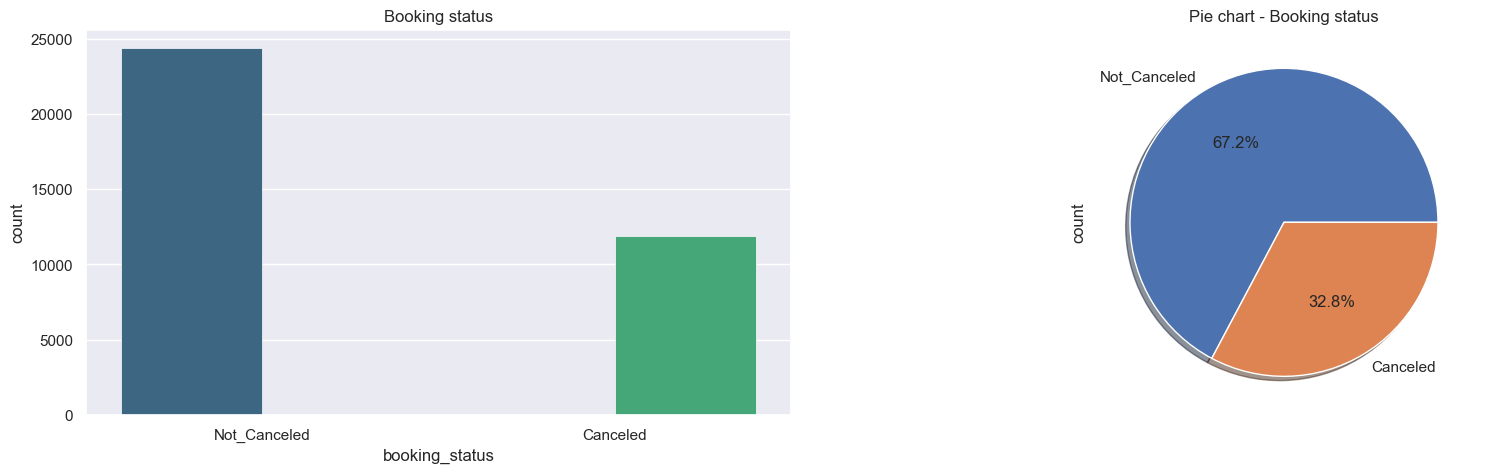

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(x='booking_status', data=booking, hue='booking_status', palette='viridis', dodge=True, linewidth=0.5, ax=ax[0])
ax[0].set_title('Booking status')

booking['booking_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, ax=ax[1])
ax[1].set_title('Pie chart - Booking status')

plt.show()

##### Numercial Features

In [50]:
booking.dtypes[booking.dtypes != 'object']

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
dtype: object

In [51]:
booking['no_of_adults'].value_counts()

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64

<Axes: xlabel='no_of_adults', ylabel='count'>

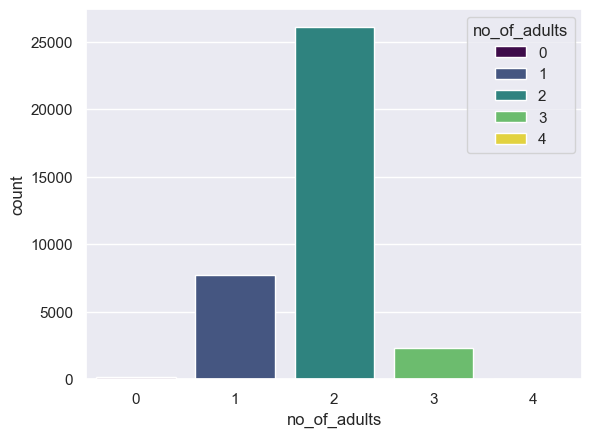

In [57]:
sns.countplot(x='no_of_adults', data=booking, hue='no_of_adults' ,palette='viridis')

In [52]:
booking['no_of_children'].value_counts()

no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

<Axes: xlabel='no_of_children', ylabel='count'>

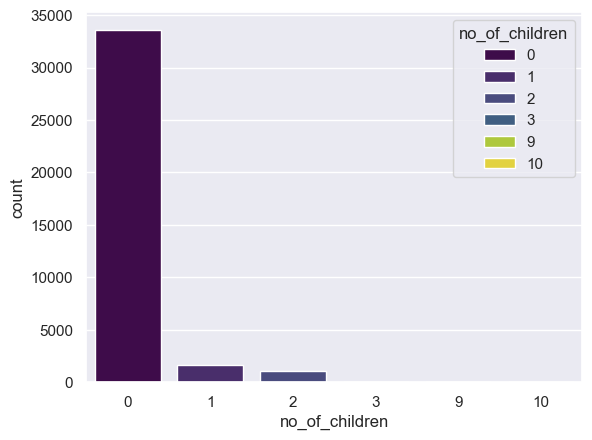

In [58]:
sns.countplot(x='no_of_children', data=booking, hue='no_of_children' ,palette='viridis')

<Axes: xlabel='no_of_week_nights', ylabel='count'>

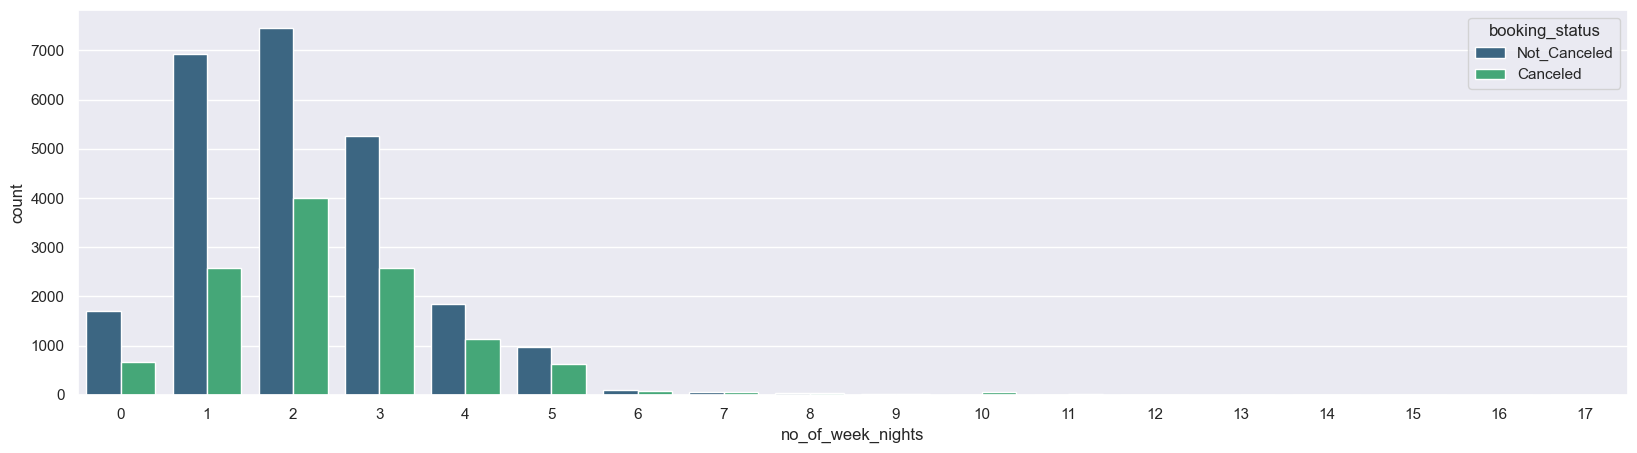

In [65]:
plt.figure(figsize=(20,5))
sns.countplot(x='no_of_week_nights', data=booking, hue='booking_status' ,palette='viridis')

<Axes: xlabel='no_of_weekend_nights', ylabel='count'>

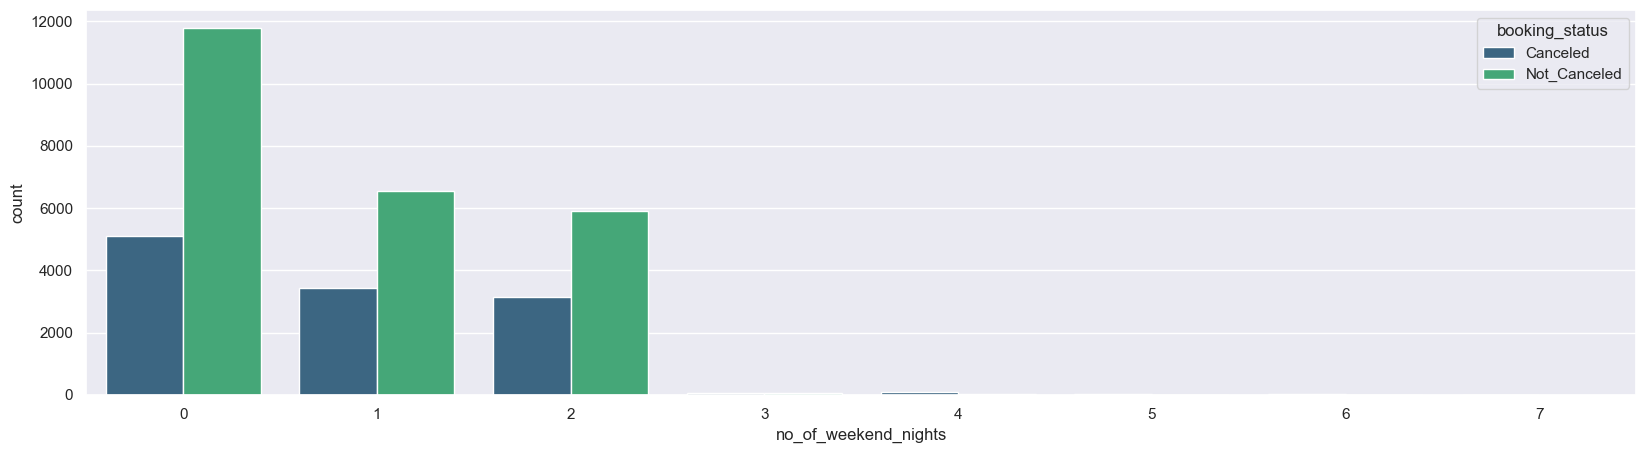

In [66]:
plt.figure(figsize=(20,5))
sns.countplot(x='no_of_weekend_nights', data=booking, hue='booking_status',palette='viridis')

In [68]:
booking['required_car_parking_space'].value_counts()

required_car_parking_space
0    35151
1     1124
Name: count, dtype: int64

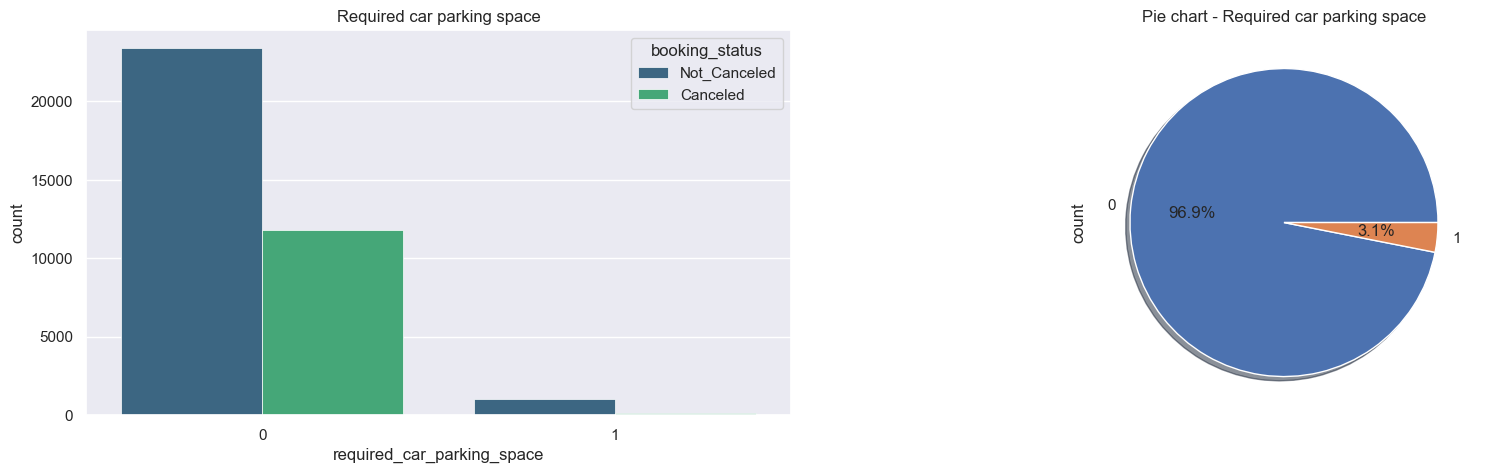

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(x='required_car_parking_space', data=booking, hue='booking_status', palette='viridis', dodge=True, linewidth=0.5, ax=ax[0])
ax[0].set_title('Required car parking space')

booking['required_car_parking_space'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, ax=ax[1])
ax[1].set_title('Pie chart - Required car parking space')

plt.show()

In [88]:
booking['no_of_special_requests'].value_counts()

no_of_special_requests
0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: count, dtype: int64

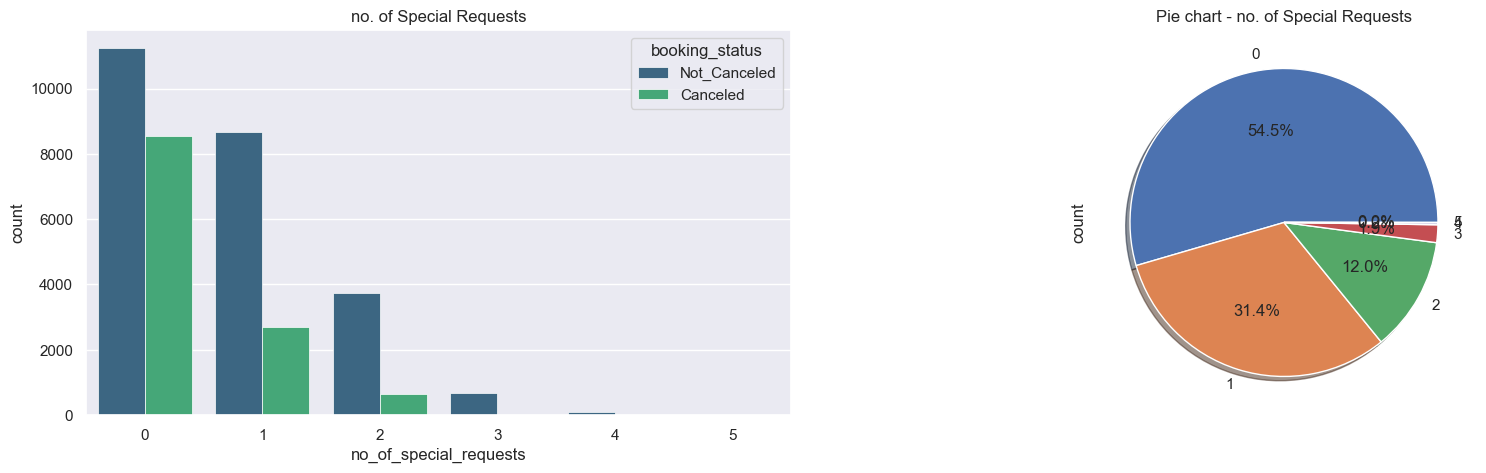

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(x='no_of_special_requests', data=booking, hue='booking_status', palette='viridis', dodge=True, linewidth=0.5, ax=ax[0])
ax[0].set_title('no. of Special Requests')

booking['no_of_special_requests'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, ax=ax[1])
ax[1].set_title('Pie chart - no. of Special Requests')

plt.show()

<Axes: xlabel='market_segment_type', ylabel='avg_price_per_room'>

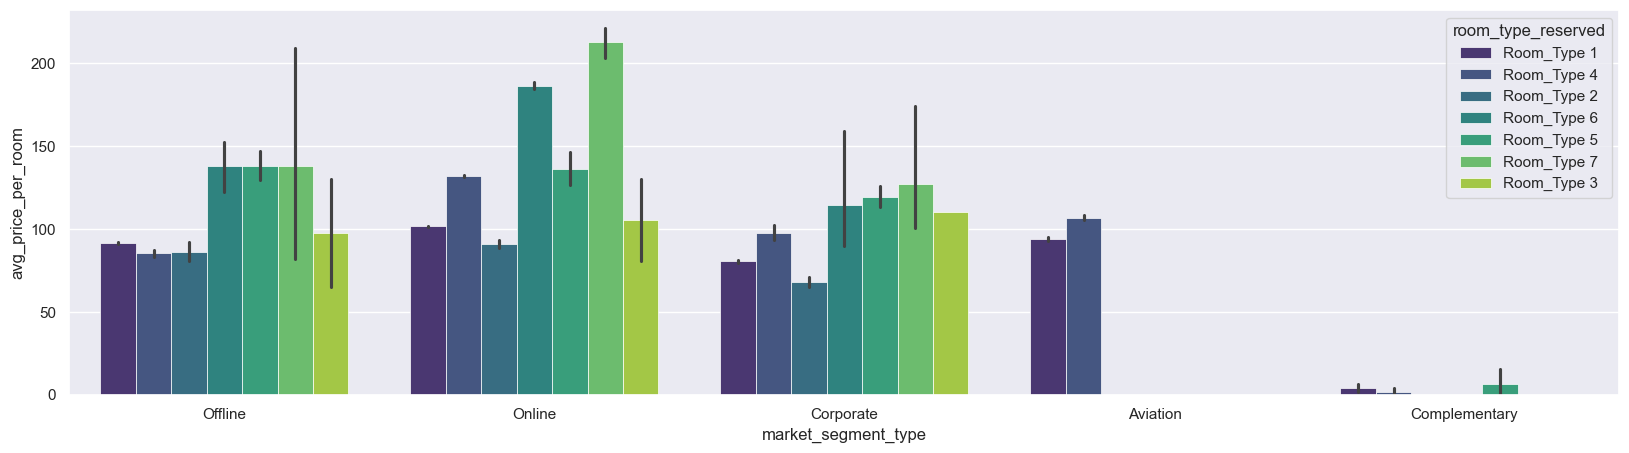

In [99]:
# Market segment vs avg.price/room

plt.figure(figsize=(20, 5))
sns.barplot(x='market_segment_type', y='avg_price_per_room', data=booking, hue='room_type_reserved', palette= 'viridis', dodge=True, linewidth=0.5)


<Axes: xlabel='arrival_month', ylabel='no_of_previous_cancellations'>

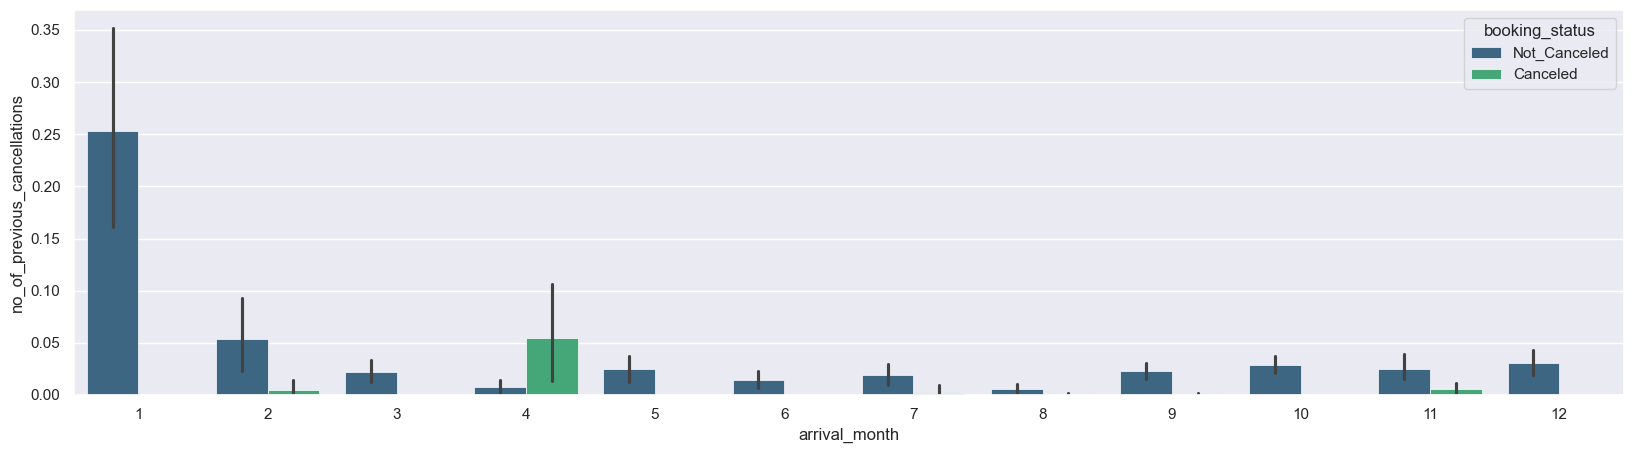

In [100]:
# Highest number of cancellation per month

plt.figure(figsize=(20, 5))
sns.barplot(x='arrival_month', y='no_of_previous_cancellations', data=booking, hue='booking_status', palette= 'viridis', dodge=True, linewidth=0.5)

### Feature Engineering

In [91]:
booking.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [102]:
booking['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

In [108]:
booking['booking_status'] = pd.get_dummies(booking['booking_status'], drop_first=True)

<Axes: >

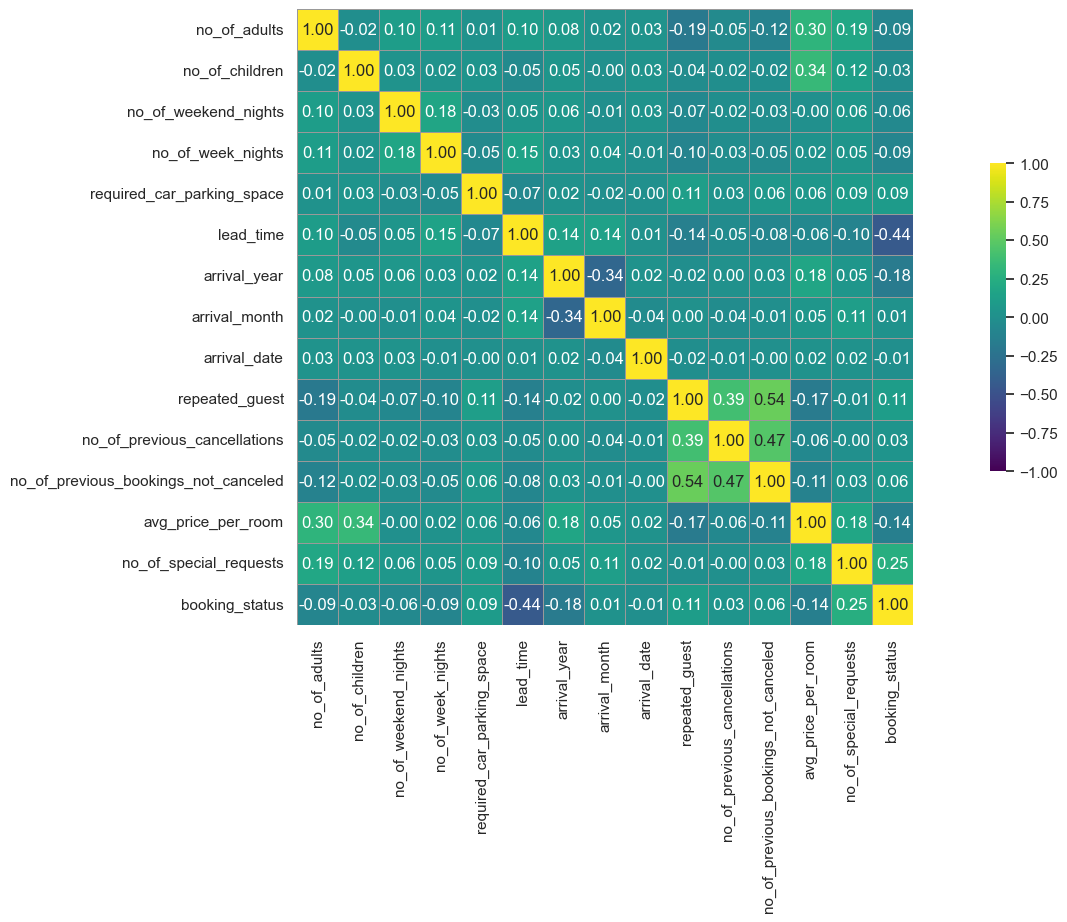

In [111]:
plt.figure(figsize=(20, 8))
sns.heatmap(booking.corr(numeric_only=True), annot=True, cmap='viridis', linewidths=.5, fmt='.2f', center=0.0, square=True, cbar_kws={"shrink": .5}, linecolor='#999999', vmin=-1, vmax=1, xticklabels=True, yticklabels=True, annot_kws={"size": 12}, cbar=True)

In [120]:
df = booking[['no_of_adults', 'no_of_children', 'no_of_weekend_nights','no_of_week_nights', 'type_of_meal_plan','room_type_reserved','market_segment_type','repeated_guest','no_of_previous_cancellations','avg_price_per_room','no_of_special_requests','booking_status']]

In [121]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,market_segment_type,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,Room_Type 1,Offline,0,0,65.00,0,True
1,2,0,2,3,Not Selected,Room_Type 1,Online,0,0,106.68,1,True
2,1,0,2,1,Meal Plan 1,Room_Type 1,Online,0,0,60.00,0,False
3,2,0,0,2,Meal Plan 1,Room_Type 1,Online,0,0,100.00,0,False
4,2,0,1,1,Not Selected,Room_Type 1,Online,0,0,94.50,0,False


In [122]:
df['type_of_meal_plan'].value_counts(), df['room_type_reserved'].value_counts(), df['market_segment_type'].value_counts(), 

(type_of_meal_plan
 Meal Plan 1     27835
 Not Selected     5130
 Meal Plan 2      3305
 Meal Plan 3         5
 Name: count, dtype: int64,
 room_type_reserved
 Room_Type 1    28130
 Room_Type 4     6057
 Room_Type 6      966
 Room_Type 2      692
 Room_Type 5      265
 Room_Type 7      158
 Room_Type 3        7
 Name: count, dtype: int64,
 market_segment_type
 Online           23214
 Offline          10528
 Corporate         2017
 Complementary      391
 Aviation           125
 Name: count, dtype: int64)

In [123]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type_of_meal_plan'] = le.fit_transform(df['type_of_meal_plan'])
df['room_type_reserved'] = le.fit_transform(df['room_type_reserved'])
df['market_segment_type'] = le.fit_transform(df['market_segment_type'])
df['booking_status'] = le.fit_transform(df['booking_status'])

C:\Users\Amr Ahmed\AppData\Local\Temp\ipykernel_1576\1842001541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type_of_meal_plan'] = le.fit_transform(df['type_of_meal_plan'])
C:\Users\Amr Ahmed\AppData\Local\Temp\ipykernel_1576\1842001541.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['room_type_reserved'] = le.fit_transform(df['room_type_reserved'])
C:\Users\Amr Ahmed\AppData\Local\Temp\ipykernel_1576\1842001541.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [124]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,market_segment_type,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,3,0,0,65.00,0,1
1,2,0,2,3,3,0,4,0,0,106.68,1,1
2,1,0,2,1,0,0,4,0,0,60.00,0,0
3,2,0,0,2,0,0,4,0,0,100.00,0,0
4,2,0,1,1,3,0,4,0,0,94.50,0,0


In [129]:
df.corr()['booking_status'].sort_values(ascending=False)

booking_status                  1.000000
no_of_special_requests          0.253070
repeated_guest                  0.107287
no_of_previous_cancellations    0.033728
room_type_reserved             -0.022986
type_of_meal_plan              -0.026706
no_of_children                 -0.033078
no_of_weekend_nights           -0.061563
no_of_adults                   -0.086920
no_of_week_nights              -0.092996
market_segment_type            -0.136008
avg_price_per_room             -0.142569
Name: booking_status, dtype: float64

#### Split Dataset

In [130]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

##### Feature scaling

In [134]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Model Building

 - Logistic Regression

In [152]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print('accuracy score of training data: ', accuracy_score(y_train, lr.predict(X_train)))
print('accuracy score of test data: ', accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score of training data:  0.7349758787043418
accuracy score of test data:  0.7200551343900758
[[ 922 1494]
 [ 537 4302]]
              precision    recall  f1-score   support

           0       0.63      0.38      0.48      2416
           1       0.74      0.89      0.81      4839

    accuracy                           0.72      7255
   macro avg       0.69      0.64      0.64      7255
weighted avg       0.71      0.72      0.70      7255



- K-Nearest Neighbors classifier

In [154]:
# Gridsearchcv for knn classifier

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
Knn_cv = GridSearchCV(knn, param_grid={'n_neighbors': list(range(1, 30))}, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
Knn_cv.fit(X_train, y_train)
print(Knn_cv.best_score_)
print(Knn_cv.best_params_)


Fitting 5 folds for each of 29 candidates, totalling 145 fits
0.7928325292901448
{'n_neighbors': 7}


In [155]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn = knn.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('accuracy score of training data: ', accuracy_score(y_train, lr.predict(X_train)))
print('accuracy score of test data: ', accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score of training data:  0.7349758787043418
accuracy score of test data:  0.7200551343900758
[[ 922 1494]
 [ 537 4302]]
              precision    recall  f1-score   support

           0       0.63      0.38      0.48      2416
           1       0.74      0.89      0.81      4839

    accuracy                           0.72      7255
   macro avg       0.69      0.64      0.64      7255
weighted avg       0.71      0.72      0.70      7255



- Naive Bayes

In [156]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print('accuracy score of training data: ', accuracy_score(y_train, lr.predict(X_train)))
print('accuracy score of test data: ', accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score of training data:  0.7349758787043418
accuracy score of test data:  0.4931771192281185
[[2247  169]
 [3508 1331]]
              precision    recall  f1-score   support

           0       0.39      0.93      0.55      2416
           1       0.89      0.28      0.42      4839

    accuracy                           0.49      7255
   macro avg       0.64      0.60      0.48      7255
weighted avg       0.72      0.49      0.46      7255



- Decision Tree

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
param_grid = {'max_depth': [1,3,5,7,9], 'criterion': ['gini', 'entropy']}
CV_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv= 5)
CV_dt.fit(X_train, y_train)
print(CV_dt.best_score_)
print(CV_dt.best_params_)

0.7757753273604411
{'criterion': 'gini', 'max_depth': 9}


In [159]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=9, criterion='gini')
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('accuracy score of training data: ', accuracy_score(y_train, lr.predict(X_train)))
print('accuracy score of test data: ', accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score of training data:  0.7349758787043418
accuracy score of test data:  0.7638869745003446
[[1292 1124]
 [ 589 4250]]
              precision    recall  f1-score   support

           0       0.69      0.53      0.60      2416
           1       0.79      0.88      0.83      4839

    accuracy                           0.76      7255
   macro avg       0.74      0.71      0.72      7255
weighted avg       0.76      0.76      0.76      7255



- Random Forest Classifier

In [162]:
# Random Forest classifier with gridsearchcv

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='gini')
param_grid = { 
    'n_estimators': [32, 64, 128],
    'max_depth' : [3,4,5],
    'bootstrap': [True, False]
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_score_)
print(CV_rfc.best_params_)

0.74855272226051
{'bootstrap': False, 'max_depth': 5, 'n_estimators': 64}


In [164]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=64, max_depth=5, bootstrap=False)
rfc = rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('accuracy score of training data: ', accuracy_score(y_train, lr.predict(X_train)))
print('accuracy score of test data: ', accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score of training data:  0.7349758787043418
accuracy score of test data:  0.732736044107512
[[ 883 1533]
 [ 406 4433]]
              precision    recall  f1-score   support

           0       0.69      0.37      0.48      2416
           1       0.74      0.92      0.82      4839

    accuracy                           0.73      7255
   macro avg       0.71      0.64      0.65      7255
weighted avg       0.72      0.73      0.71      7255



##### => Decision Tree Classifier is the best model and highest accuracy score

In [167]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,market_segment_type,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,3,0,0,65.00,0,1
1,2,0,2,3,3,0,4,0,0,106.68,1,1
2,1,0,2,1,0,0,4,0,0,60.00,0,0
3,2,0,0,2,0,0,4,0,0,100.00,0,0
4,2,0,1,1,3,0,4,0,0,94.50,0,0


In [175]:
customer_data = np.array([2, 0, 2, 2, 1, 0,3,0,0,200,1]).reshape(1, -1)
#lr.predict(customer_data)

if dt.predict(customer_data) == 0:
    print('The customer will not cancel the booking')
else:
    print('The customer will cancel the booking')

The customer will cancel the booking


------

-----